### Questions 1 and 2: ACT scores, part 1

The ACT is a standardized college admissions test used in the United States. The four multi-part questions in this assessment all involve simulating some ACT test scores and answering probability questions about them.

For the three year period 2016-2018, ACT standardized test scores were approximately normally distributed with a mean of 20.9 and standard deviation of 5.7. (Real ACT scores are integers between 1 and 36, but we will ignore this detail and use continuous values instead.)

First we'll simulate an ACT test score dataset and answer some questions about it.

Set the seed to 16, then use rnorm to generate a normal distribution of 10000 tests with a mean of 20.9 and standard deviation of 5.7. Save these values as act_scores. You'll be using this dataset throughout these four multi-part questions.

**(IMPORTANT NOTE! If you use R 3.6 or later, you will need to use the command set.seed(x, sample.kind = "Rounding") instead of set.seed(x). Your R version will be printed at the top of the Console window when you start RStudio.)**

In [2]:
set.seed(16, sample.kind="Rounding")

Warning message in set.seed(16, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”

In [3]:
act_scores <- rnorm(10000,20.9,5.7)

Question 1a

What is the mean of act_scores?

In [4]:
mean(act_scores)

[1] 20.84012

Question 1b

What is the standard deviation of act_scores?

In [5]:
sd(act_scores)

[1] 5.675237


Question 1c

A perfect score is 36 or greater (the maximum reported score is 36).

In act_scores, how many perfect scores are there out of 10,000 simulated tests?

In [9]:
sum(act_scores >= 36)

[1] 41

Question 1d

In act_scores, what is the probability of an ACT score greater than 30?

In [13]:
mean(act_scores > 30)

[1] 0.0527

Question 1e

In act_scores, what is the probability of an ACT score less than or equal to 10?

In [14]:
mean(act_scores <=10)

[1] 0.0282

Question 2

Set x equal to the sequence of integers 1 to 36. Use dnorm to determine the value of the probability density function over x given a mean of 20.9 and standard deviation of 5.7; save the result as f_x. Plot x against f_x.

Which of the following plots is correct?

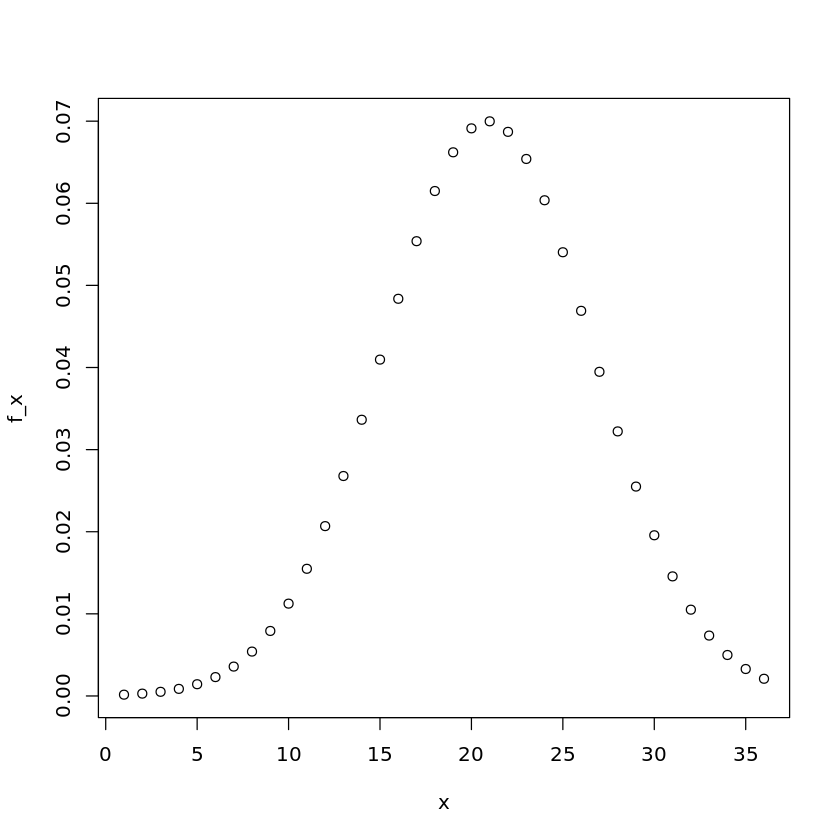

In [15]:
x <- seq (1:36)
f_x <- dnorm(x,20.9,5.7)
plot(x,f_x)

# Questions 3 and 4: ACT scores, part 2

In this 3-part question, you will convert raw ACT scores to Z-scores and answer some questions about them.

Convert act_scores to Z-scores. Recall from Data Visualization (the second course in this series) that to standardize values (convert values into Z-scores, that is, values distributed with a mean of 0 and standard deviation of 1), you must subtract the mean and then divide by the standard deviation. Use the mean and standard deviation of act_scores, not the original values used to generate random test scores.

In [17]:
x_bar <- mean(act_scores)
sigma <- sd(act_scores)

z_scores <- (act_scores - x_bar) / sigma

### Question 3a

What is the probability of a Z-score greater than 2 (2 standard deviations above the mean)?

In [19]:
mean(z_scores > 2)

[1] 0.0233

### Question 3b

What ACT score value corresponds to 2 standard deviations above the mean (Z = 2)?

This is an intuitive one. just reverse the formula for z-score 

z_scores * sigma + x_bar

In [20]:
2 * sigma + x_bar

[1] 32.1906

### Question 3c

A Z-score of 2 corresponds roughly to the 97.5th percentile.

Use qnorm to determine the 97.5th percentile of normally distributed data with the mean and standard deviation observed in act_scores.

What is the 97.5th percentile of act_scores?

In [22]:
qnorm(0.975, x_bar, sigma)

[1] 31.96338


## In this 4-part question, you will write a function to create a CDF for ACT scores.

Write a function that takes a value and produces the probability of an ACT score less than or equal to that value (the CDF). Apply this function to the range 1 to 36.

In [30]:
to_range <- seq(1:36)

p_act <- function(val){
    pnorm(val, x_bar, sigma)
    
}

data.frame(to_range, sapply(to_range, p_act))

to_range,sapply.to_range..p_act.
<int>,<dbl>
1,0.0002362234
2,0.0004505606
3,0.0008346951
4,0.0015021464
5,0.0026265086
6,0.0044628076
7,0.0073703838
8,0.0118338206
9,0.0184767296


### Question 4b

Use qnorm to determine the expected 95th percentile, the value for which the probability of receiving that score or lower is 0.95, given a mean score of 20.9 and standard deviation of 5.7.

What is the expected 95th percentile of ACT scores?

In [31]:
qnorm(0.95,20.9,5.7)

[1] 30.27567

### Question 4c

As discussed in the Data Visualization course, we can use quantile to determine sample quantiles from the data.

Make a vector containing the quantiles for p <- seq(0.01, 0.99, 0.01), the 1st through 99th percentiles of the act_scores data. Save these as sample_quantiles.

In what percentile is a score of 26?
Note that a score between the 98th and 99th percentile should be considered the 98th percentile, for example, and that quantile numbers are used as names for the vector sample_quantiles.

In [32]:
p <- seq(0.01, 0.99, 0.01)

sample_quantiles <- qnorm(p,x_bar, sigma)

data.frame(p*100, sample_quantiles)

p...100,sample_quantiles
<dbl>,<dbl>
1,7.637546
2,9.184610
3,10.166172
4,10.904563
5,11.505187
6,12.016413
7,12.464658
8,12.866007
9,13.231019


### Question 4d

Make a corresponding set of theoretical quantiles using qnorm over the interval p <- seq(0.01, 0.99, 0.01) with mean 20.9 and standard deviation 5.7. Save these as theoretical_quantiles. Make a QQ-plot graphing sample_quantiles on the y-axis versus theoretical_quantiles on the x-axis.

Which of the following graphs is correct?

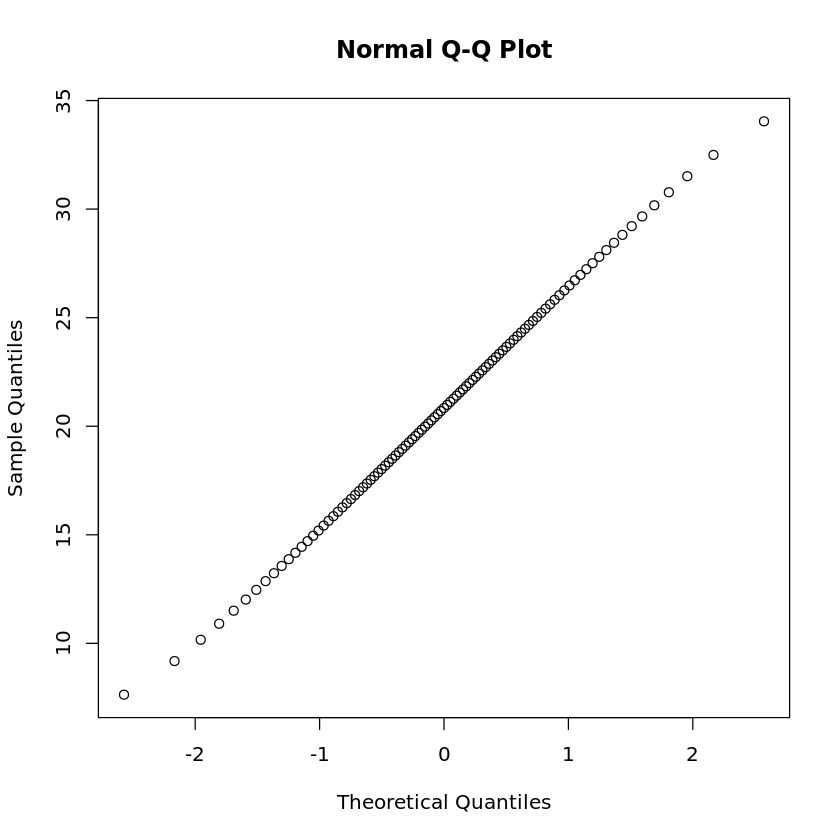

In [33]:
qqnorm(sample_quantiles)